### 1. zadatak (10 poena)

U datoteci `framingham.csv` se nalaze medicinski podaci stanovnika Framinghama koji su učestvovali u ispitivanjima prevencije kardiovaskularnih bolesti. Skup sadrži 15 atributa koji objedinjuju sociološke i medicinske karakteristike ispitanika kao što su starosna dob, pol, indeks telesne mase, koncentracija šećera u krvi i drugi. Potrebno je napraviti klasifikator koji na osnovu ovih podataka može da predvidi pojavu srčanih problema. Informacije o pojavi srčanih problema ispitanika evidentirane su na nivou atributa `TenYearCHD`. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

a) Učitati podatke koji se nalaze u datoteci `framingham.csv`. Obrisati kolonu `education`, a potom obrisati i sve vrste koje sadrže barem jednu nedostajuću vrednost. 

In [3]:
data = pd.read_csv('framingham.csv')

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.shape

(4238, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.drop(columns=['education'], inplace=True)

In [8]:
data.dropna(axis=0, how='any', inplace=True)

In [9]:
data.shape

(3749, 15)

b) Grafikonom sa stubićima prikazati odnos pacijenata po polu.  

In [10]:
male_patients = data[data['male'] == 1].shape[0]

In [11]:
female_patients = data[data['male'] == 0].shape[0]

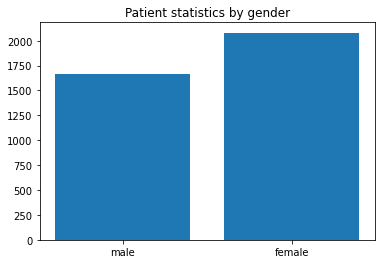

In [12]:
plt.title('Patient statistics by gender')
plt.bar(['male', 'female'], [male_patients, female_patients])
plt.show()

c) Grafikonom sa stubićima prikazati odnos pušača i nepušaća sa srčanim problemima. 

In [13]:
smoker_info = data[data['TenYearCHD']==1]['currentSmoker']

In [14]:
smoker_info.value_counts()

1    294
0    278
Name: currentSmoker, dtype: int64

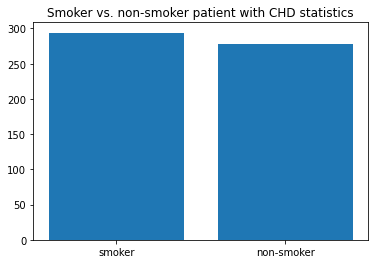

In [15]:
plt.title('Smoker vs. non-smoker patient with CHD statistics')
plt.bar(['smoker', 'non-smoker'], [smoker_info.value_counts().values[0], smoker_info.value_counts().values[1]])
plt.show()

d) Izdvojiti vrednost ciljne promenljive `TenYearCHD` koja predviđa mogućnost oboljenja u narednih 10 godina, a potom podeliti podatke na skup za treniranje i skup za testiranje u razmeri 2:1. Prilikom podele podataka voditi računa o stratifikaciji. Parametar `random_state` postaviti na vrednost 5. 

In [16]:
y = data['TenYearCHD']
X = data.drop(columns=['TenYearCHD'])

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=5, stratify=y)

e) Izvršiti standardizaciju podataka. 

In [18]:
scaler = preprocessing.StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

f) Kreirati i obučiti model logističke regresije sa težinama 1 i 4 koje, redom, odgovaraju klasama 0 i 1. 

In [21]:
model = linear_model.LogisticRegression(class_weight={0: 1, 1: 4})

In [22]:
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 1, 1: 4})

g) Dati F1 ocenu modela, a potom posebno izračunati i F1 ocene po polovima. Da li model daje bolje predikcije za muškarce ili žene? 

In [23]:
y_predicted = model.predict(X_test_scaled)

In [24]:
f1_score = metrics.f1_score(y_test, y_predicted)

In [25]:
f1_score

0.39272727272727265

In [26]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1049
           1       0.30      0.57      0.39       189

    accuracy                           0.73      1238
   macro avg       0.60      0.67      0.61      1238
weighted avg       0.81      0.73      0.76      1238



In [27]:
female_test_indexes = X_test[X_test['male']==0].index

In [28]:
female_predictions = model.predict(X_test[X_test['male']==0])

In [29]:
f1_female = metrics.f1_score(y_test[female_test_indexes], female_predictions)

In [30]:
print('F1 ocena za zene: ', f1_female)

F1 ocena za zene:  0.22757697456492637


In [31]:
male_test_indexes = X_test[X_test['male']==1].index

In [32]:
male_predictions = model.predict(X_test[X_test['male']==1])

In [33]:
f1_male = metrics.f1_score(y_test[male_test_indexes], male_predictions)

In [34]:
print('F1 ocena za muskarce: ', f1_male)

F1 ocena za muskarce:  0.30588235294117644


h) Za obučeni model izdvojiti atribute koji imaju najveći pozitivan i najveći negativan uticaj na predikciju. 

In [35]:
model_coefs = model.coef_[0]

In [36]:
model_coefs

array([ 0.28383588,  0.60035917,  0.106153  ,  0.21084256,  0.00154426,
        0.05884207,  0.1125221 ,  0.02432486,  0.12815294,  0.28059007,
        0.02480344, -0.01742216, -0.10618391,  0.11031645])

In [37]:
model_attributes = X.columns

In [38]:
model_attributes

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [39]:
positive_influence_index = np.argmax(model_coefs)

In [40]:
model_attributes[positive_influence_index]

'age'

In [41]:
negative_influence_index = np.argmin(model_coefs)

In [42]:
model_attributes[negative_influence_index]

'heartRate'